<a href="https://colab.research.google.com/github/WittyTheMighty/Intro-to-RL/blob/main/Monte_Carlos_simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gym


In [ ]:
from frozen_lake import FrozenLakeEnv
import gym
import random
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from matplotlib import rc_params




In [ ]:
env = FrozenLakeEnv(map_name="4x4", slip_rate=0.1)
env.reset()
env.render()

# 0 is left, 1 is down, 2 is right, 3 is up
next_state, reward, done, extra =  env.step(1)
print("Next state:",next_state)
print("reward:",reward)
print("Done:", done)
print("extra:",extra)
print(env.isd)

env.render()



SFFF
FHFH
FFFH
HFFG
Next state: 4
reward: -1
Done: False
extra: {'prob': 0.9}
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  (Down)
SFFF
FHFH
FFFH
HFFG


In [ ]:
env.action_space.n

4

In [ ]:
def generate_episode(policy,env,to_render):
    done = False
    possible_actions = [ i for i in range(env.action_space.n)]
    assert len(possible_actions) == len(policy[0])

    current_state = 0
    nb_step = 0 
    states = []
    actions = []
    rewards = []
    if to_render:
        env.render()
    while not done:
    
        a = np.random.choice(possible_actions, p=policy[current_state])
        next_state, reward, done, extra = env.step(a)
        
        nb_step +=1
        if nb_step >= 100:
            next_state,reward,done =current_state,-50,True
        #Rendering
        if to_render:
            env.render()
        states.append(current_state)    
        actions.append(a)
        rewards.append(reward)
    
        current_state = next_state              
    return (states,actions,rewards)
        


In [ ]:

frozen_env = FrozenLakeEnv(map_name="4x4", slip_rate=0.1)
frozen_env.reset()
policy = [[0.25 for i in range(env.action_space.n)] for i in range(env.observation_space.n)]
generate_episode(policy,frozen_env,False)



([0, 0, 0, 0, 0, 0, 4, 8, 9, 13, 14, 13, 13, 14, 10, 14, 10, 6, 7],
 [3, 0, 3, 0, 3, 1, 1, 2, 1, 2, 0, 1, 2, 0, 1, 3, 2, 2, 3],
 [-1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -100])

In [ ]:
s = [1,2,3,4]
a = [6,5,4,3]
r = [98,7,5,4]
reserved_list=list(zip(reversed(s),reversed(a),reversed(r)))
print(reserved_list)


[(4, 3, 4), (3, 4, 5), (2, 5, 7), (1, 6, 98)]


In [ ]:
#Question 2

def mc_control_soft(env,epsillon = 0.05,gamma = 0.99,render=False):
    
    #Initialize
    # 2D array with [state][action]
    policy = [[np.random.rand()*-100 for i in range(env.action_space.n)] for i in range(env.observation_space.n)]
    
    #Normalize policy
    policy = [[policy[state_policy][policy_value]/sum(policy[state_policy]) for policy_value in range(env.action_space.n)] 
              for state_policy in range(len(policy))]
          
    step_action_counter = dict.fromkeys([key for key in range(env.observation_space.n)], 0)
    # Value is a tuple [0]:Q-value [1]:Step-action counter (strategy to save memory, alternative to map or set)
    
    Q = [[[0,0] for j in range(env.action_space.n)] for i in range(env.observation_space.n)]
    undiscounted_history = []
    
    for it in range(2000):
        env.reset()
        s,a,r = generate_episode(policy,env,False)
        
        reversed_steps = list(zip(reversed(s),reversed(a),reversed(r)))
        
        
        G = 0
        #For plotting
        undiscounted_history.append(sum(r))
        for step_idx,(state,action,reward) in enumerate(reversed_steps):
            
            G = gamma * G +reward
            
            #Verify if not seen (state,action before)
            if not (state, action) in [(reversed_steps[j][0],reversed_steps[j][1]) for j in range(len(reversed_steps)-1,step_idx,-1)]:
                #Update 
                Q[state][action][1]+=1
                Q[state][action][0] =Q[state][action][0] + 1/(Q[state][action][1])*(G -Q[state][action][0])

                find_best_q = [i[0] for i in Q[state]]
                #Breaking ties
                q_star_action = np.random.choice(np.flatnonzero(find_best_q == np.max(np.asarray(find_best_q))))

                for a_idx, action in enumerate(policy[state]):

                    if a_idx == q_star_action:
                        policy[state][a_idx] = 1- epsillon + epsillon/len(policy[state])
                    else:
                        policy[state][a_idx] = epsillon/len(policy[state])
                    
    return policy, undiscounted_history
                    
        
    
    
    
frozen_env = FrozenLakeEnv(map_name="4x4", slip_rate=0.1)
frozen_env.reset()
policy_learned,history = mc_control_soft(frozen_env)    
    
    

In [ ]:
avg_mc_soft_policy = []
avg_mc_soft_undiscounted = []
for i in range(10):
    frozen_env.reset()
    pol,undisc = mc_control_soft(frozen_env)
    avg_mc_soft_undiscounted.append(np.asarray(undisc))
    avg_mc_soft_policy.append(pol)

In [ ]:
avg_plot = np.mean(avg_mc_soft_undiscounted, axis =0)

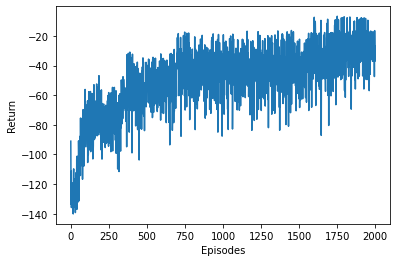

In [ ]:








#q
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(history))],avg_plot)
plt.xlabel("Episodes")
plt.ylabel("Return")
plt.show()

In [ ]:
#b
frozen_env.reset()
generate_episode(avg_mc_soft_policy[1],frozen_env,True)


SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG


([0, 1, 2, 6, 10, 14, 10, 11],
 [2, 2, 1, 1, 1, 0, 2, 2],
 [-1, -1, -1, -1, -1, -1, -1, -100])

In [ ]:
#c

sub_array = [np.mean(avg_mc_soft_undiscounted[i][1900:2000]) for i in range(len(avg_mc_soft_undiscounted))]
print("Mean by run:", sub_array)
print("mean:", np.mean(sub_array))

Mean by run: [-24.39, -23.43, -29.24, -24.34, -22.39, -21.59, -19.47, -31.96, -22.54, -43.49]
mean: -26.284


In [ ]:
#Adresser le bug lors que le bot va vers la droite.
frozen_env.reset()
generate_episode(avg_mc_soft_policy[7],frozen_env,True)


SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG


([0, 4, 8, 8, 9, 10, 14, 15],
 [1, 1, 0, 2, 2, 1, 2, 3],
 [-1, -1, -1, -1, -1, -1, -1, 0])

In [ ]:
#3.

#Soft 
def monte_carlos_V_prediction_weigthed(env,p, V_state,gamma = 0.99):
    #init
    Q = [[np.random.rand() for j in range(env.action_space.n)]  for i in range(env.observation_space.n)]
    C = [[0 for j in range(env.action_space.n)]  for i in range(env.observation_space.n)]
    b = [[0.25 for j in range(env.action_space.n)] for i in range(env.observation_space.n)]
    Q_history = []
    
    V_history = []
    for run in range(2000):
        env.reset()
        s,a,r = generate_episode(b,env,False)
        G=0
        W = 1
        reversed_steps = list(zip(reversed(s),reversed(a),reversed(r)))
        for state,action,reward in reversed_steps:
            G = gamma*G + reward
            C[state][action] += W
            Q[state][action] +=  (W/C[state][action])*(G-Q[state][action])
            W += W*p[state][action]/b[state][action]
        Q_history.append(Q[V_state][action])
        
        V_history.append(np.dot(np.asarray(Q[V_state]),np.asarray(b[V_state])))
    return V_history

#Soft 
def monte_carlos_V_prediction_ordinary(env,p, V_state,gamma = 0.99):
    
    #Init
    Q = [[[0,0] for j in range(env.action_space.n)]  for i in range(env.observation_space.n)]
    V = [[np.random.rand(),0] for i in range(env.observation_space.n)]
    V_history = []
    Q_history = []
    b = [[0.25 for j in range(env.action_space.n)] for i in range(env.observation_space.n)]
  
    for run in range(2000):
        env.reset()
        s,a,r = generate_episode(b,env,False)
        G=0
        reversed_steps = list(zip(reversed(s),reversed(a),reversed(r)))
        for idx, (state,action,reward) in enumerate(reversed_steps):
            n_visit = 0
            for i,(state1,action1,reward1) in enumerate(reversed_steps,start=idx):
                if (state,action) == (state1,action1):
                    n_visit+=1
            
            W=p[state][action]/b[state][action]
            G = gamma*G + reward
            Q[state][action][1] +=1
            Q[state][action][0] += (W/(n_visit+1))*(G-Q[state][action][0])
          
        Q_history.append(Q[V_state][action][0])
        q = [value[0] for value in Q[V_state]]

        V_history.append(np.dot(np.asarray(q),np.asarray(b[V_state])))
    return V_history


frozen_env1 =  FrozenLakeEnv(map_name="4x4", slip_rate=0.1)
prediction_ordinary=monte_carlos_V_prediction_ordinary(frozen_env1,avg_mc_soft_policy[1],0,0.99)


In [ ]:
def plot_many(experiments, label=None, color=None):
    mean_exp = np.mean(experiments, axis=0)
    std_exp = np.std(experiments, axis=0)
    plt.plot(mean_exp, color=color, label=label)
    plt.fill_between(range(len(experiments[0])), mean_exp + std_exp,
    mean_exp - std_exp, color=color, alpha=0.1)

In [ ]:

frozen_env1 =  FrozenLakeEnv(map_name="4x4", slip_rate=0.1)
ordinary_sampling = monte_carlos_V_prediction_weigthed(frozen_env1,avg_mc_soft_policy[1],0)


In [ ]:
avg_mc_soft_policy[1]

[[0.0125, 0.0125, 0.9624999999999999, 0.0125],
 [0.0125, 0.0125, 0.9624999999999999, 0.0125],
 [0.0125, 0.9624999999999999, 0.0125, 0.0125],
 [0.9624999999999999, 0.0125, 0.0125, 0.0125],
 [0.0125, 0.0125, 0.0125, 0.9624999999999999],
 [0.0125, 0.0125, 0.0125, 0.9624999999999999],
 [0.0125, 0.9624999999999999, 0.0125, 0.0125],
 [0.9624999999999999, 0.0125, 0.0125, 0.0125],
 [0.0125, 0.0125, 0.0125, 0.9624999999999999],
 [0.0125, 0.9624999999999999, 0.0125, 0.0125],
 [0.0125, 0.9624999999999999, 0.0125, 0.0125],
 [0.0125, 0.0125, 0.9624999999999999, 0.0125],
 [0.0125, 0.0125, 0.9624999999999999, 0.0125],
 [0.0125, 0.0125, 0.9624999999999999, 0.0125],
 [0.0125, 0.0125, 0.9624999999999999, 0.0125],
 [0.0125, 0.0125, 0.9624999999999999, 0.0125]]

In [ ]:
val=monte_carlos_V_prediction_ordinary(frozen_env1,avg_mc_soft_policy[1],0,0.99)


In [ ]:
def plot_many(experiments, label=None, color=None):
    mean_exp = np.mean(experiments, axis=0)
    std_exp = np.std(experiments, axis=0)
    plt.plot(mean_exp, color=color, label=[label])
    plt.fill_between(range(len(experiments[0])), mean_exp + std_exp,
    mean_exp - std_exp, color=color, alpha=0.1)

In [ ]:
ordinary=[monte_carlos_V_prediction_ordinary(frozen_env1,avg_mc_soft_policy[5],0,0.99) for i in range(10)]
weigthed = [monte_carlos_V_prediction_weigthed(frozen_env1,avg_mc_soft_policy[5],0,0.99) for i in range(10)]



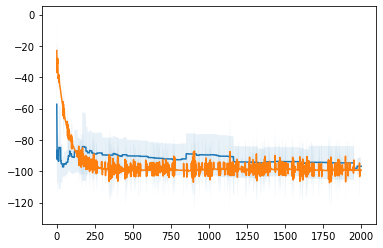

In [ ]:

plot_many(weigthed,"Weighted")
plot_many(ordinary,"Ordinary")

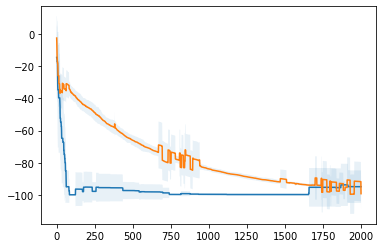

In [ ]:
ordinary2=[monte_carlos_V_prediction_ordinary(frozen_env1,avg_mc_soft_policy[5],3,0.99) for i in range(10)]
weigthed2 = [monte_carlos_V_prediction_weigthed(frozen_env1,avg_mc_soft_policy[5],3,0.99) for i in range(10)]
plot_many(weigthed2)
plot_many(ordinary2)

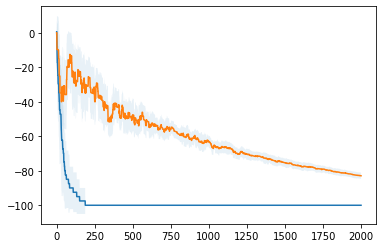

In [ ]:
ordinary3=[monte_carlos_V_prediction_ordinary(frozen_env1,avg_mc_soft_policy[5],7,0.99) for i in range(10)]
weigthed3 = [monte_carlos_V_prediction_weigthed(frozen_env1,avg_mc_soft_policy[5],7,0.99) for i in range(10)]
plot_many(weigthed3)
plot_many(ordinary3)

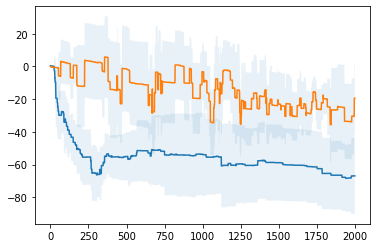

In [ ]:
ordinary4=[monte_carlos_V_prediction_ordinary(frozen_env1,avg_mc_soft_policy[5],14,0.99) for i in range(10)]
weigthed4 = [monte_carlos_V_prediction_weigthed(frozen_env1,avg_mc_soft_policy[5],14,0.99) for i in range(10)]
plot_many(weigthed4)
plot_many(ordinary4)

In [ ]:
#Lower variance weigthed one

In [ ]:
#Part 2:
import copy
def every_visit_MC_pred(env,p,gamma=0.99):
    # Init
             
    # Value is a tuple [0]:Q-value [1]:Step-action counter (strategy to save memory, alternative to map or set)
    
    V = [np.random.rand() for i in range(env.observation_space.n)]
    V_step_counter = {i:0 for i in range(env.observation_space.n)}
    
    V_history = [] 
    
    for it in range(10000):
        env.reset()
        s,a,r = generate_episode(p,env,False)
        
        reversed_steps = list(zip(reversed(s),reversed(a),reversed(r)))
     
        G = 0
        V_history.append(copy.deepcopy(V))
        for step_idx,(state,action,reward) in enumerate(reversed_steps):
            
            G = gamma * G +reward
            
            #Verify if not seen (state,action before)
                #Update 
            V_step_counter[state] += 1
            V[state] =V[state] + 1/(V_step_counter[state])*(G-V[state])
        
    return V, V_history


In [ ]:
no_splipping_env = FrozenLakeEnv(map_name="4x4-easy", slip_rate=0)
no_splipping_env.seed(1)
no_slip_pol = [[0.25 for i in range(no_splipping_env.action_space.n)] for j in range(no_splipping_env.observation_space.n)]
V,V_history=every_visit_MC_pred(no_splipping_env,no_slip_pol,gamma=0.99)


10


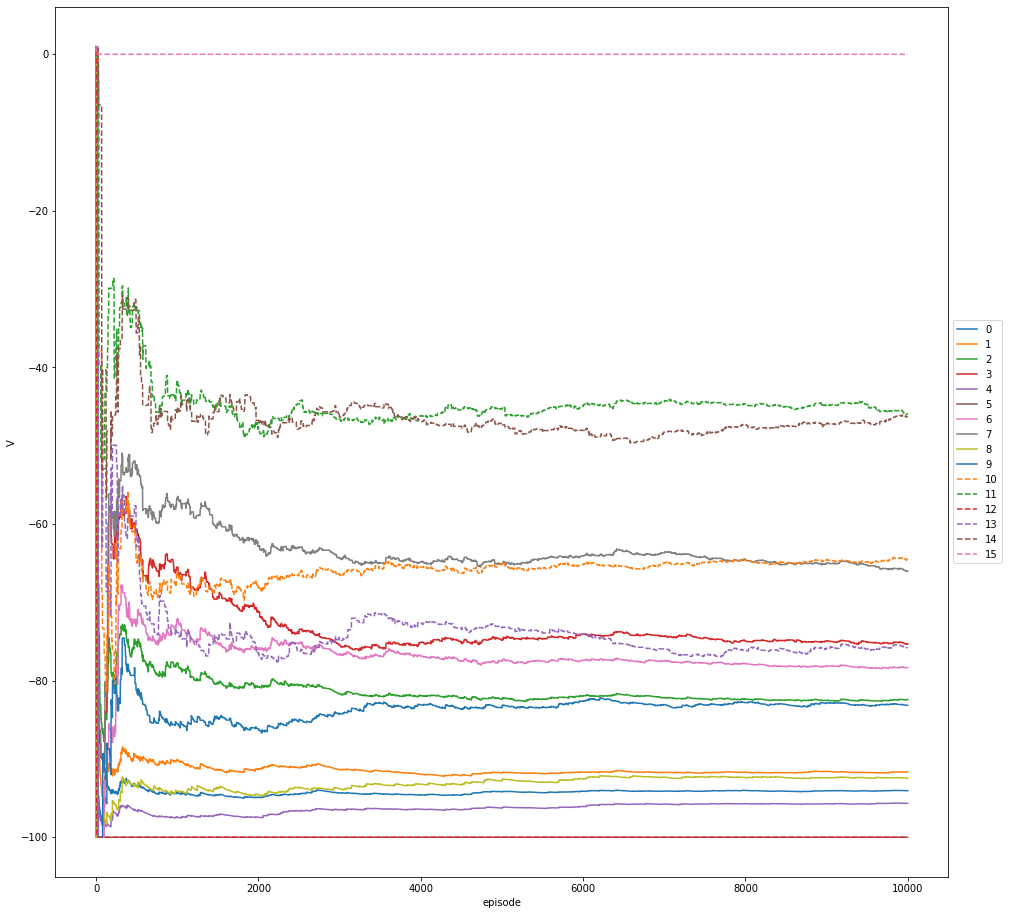

In [ ]:
from itertools import cycle
def plot_learning_value(V_history):
    fig, axs = plt.subplots(4,4,figsize=(20,20))
    
    state_idx = 0 
    x_val = [i for i in range(len(V_history))]
    for i in range(4):
        for j in range(4):
            y_val = [i[state_idx] for i in V_history]
            axs[i,j].plot(x_val,y_val)
            axs[i,j].set_title(f"State {state_idx}")
            axs[i,j].set_xlabel("episode")
            axs[i,j].set_ylabel("V")
            state_idx+=1
    plt.tight_layout()
# plot_learning_value(V_history)



def plot_learning_all_state(V_history):
        state_idx = 0 
        x_val = [i for i in range(len(V_history))]
        plt.figure(figsize=(16,16))
        prop_cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]
        colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
        print(len(colors))
        linestyle = ["-","--"]
        for i in range(16):

            y_val = y_val = [i[state_idx] for i in V_history]
            plt.plot(x_val,y_val,label=state_idx,color=colors[i % 9],linestyle=linestyle[i // 10])
            state_idx+=1

        plt.xlabel("episode")
        plt.ylabel("V")
        plt.legend([i for i in range(16)])
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()

            
plot_learning_all_state(V_history)

[[ -94.04644955  -91.61671929  -82.38342563  -75.26719477]
 [ -95.66342805 -100.          -78.31611717  -66.00195211]
 [ -92.47694098  -83.158538    -64.46319901  -45.87398335]
 [-100.          -75.79101679  -46.24539321    0.        ]]


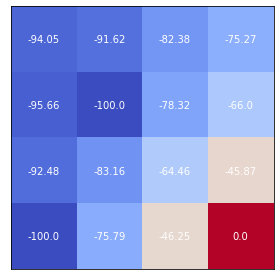

In [ ]:
def grid_map(history):
    fig, ax = plt.subplots()
    arr = np.asarray(history)
    arr2d = np.reshape(arr,(4,4))
    print(arr2d)
    ax.imshow(arr2d, cmap="coolwarm")
    for i in range(4):
        for j in range(4):
            text = ax.text(j, i, round(arr2d[i, j],2),
                           ha="center", va="center", color="w")
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)

    fig.tight_layout()
    plt.show()
    
grid_map(V_history[9999])

In [ ]:
#Question 2.2:

def td_prediction(policy1,env,alpha =0.01,gamma=0.99):
    
    # Init
             
    # Value is a tuple [0]:Q-value [1]:Step-action counter (strategy to save memory, alternative to map or set)
    
    V = [-100*np.random.rand() if i != 15 and i!=5 and i !=12 else 0 for i in range(env.observation_space.n)]
    print(V)
    #0 for terminal state
    
    possible_actions = [ i for i in range(env.action_space.n)]
    V_history = [] 
    
    for it in range(10000):
        env.reset()
        done =False
        current_state =0
        
        while True:      
            a = np.random.choice(possible_actions, p=policy1[current_state])
            next_state, reward, done, extra = env.step(a)
            

            #Breaking before we could update the value 
            if done:
                #If done the next state is 0 so we force the gamma value[next_state] to be 0 

                #Figure A in the report
                V[current_state] += alpha*(reward-V[current_state])

                #Force the reward to be -1 when it's done to take into account the step taken Figure B in report
                # V[current_state] += alpha*(reward-1-V[current_state])
                break;
            else:
                V[current_state] += alpha*(reward+gamma*V[next_state]-V[current_state])
            current_state = next_state


        V_history.append(copy.deepcopy(V))
    return V, V_history



env5 = FrozenLakeEnv(map_name="4x4-easy", slip_rate=0)
env5.seed(2)
V_tD,V_history_TD =  td_prediction(no_slip_pol,env5,alpha=0.01)


[-38.15054681155703, -97.74570600919222, -81.82894721868536, -40.39150195570631, -93.93143064370248, 0, -69.71119771686186, -53.32686996361685, -35.96844845470761, -18.448849002058655, -67.40489602383619, -44.36115649611927, 0, -92.00654531359017, -64.76062627531088, 0]


10


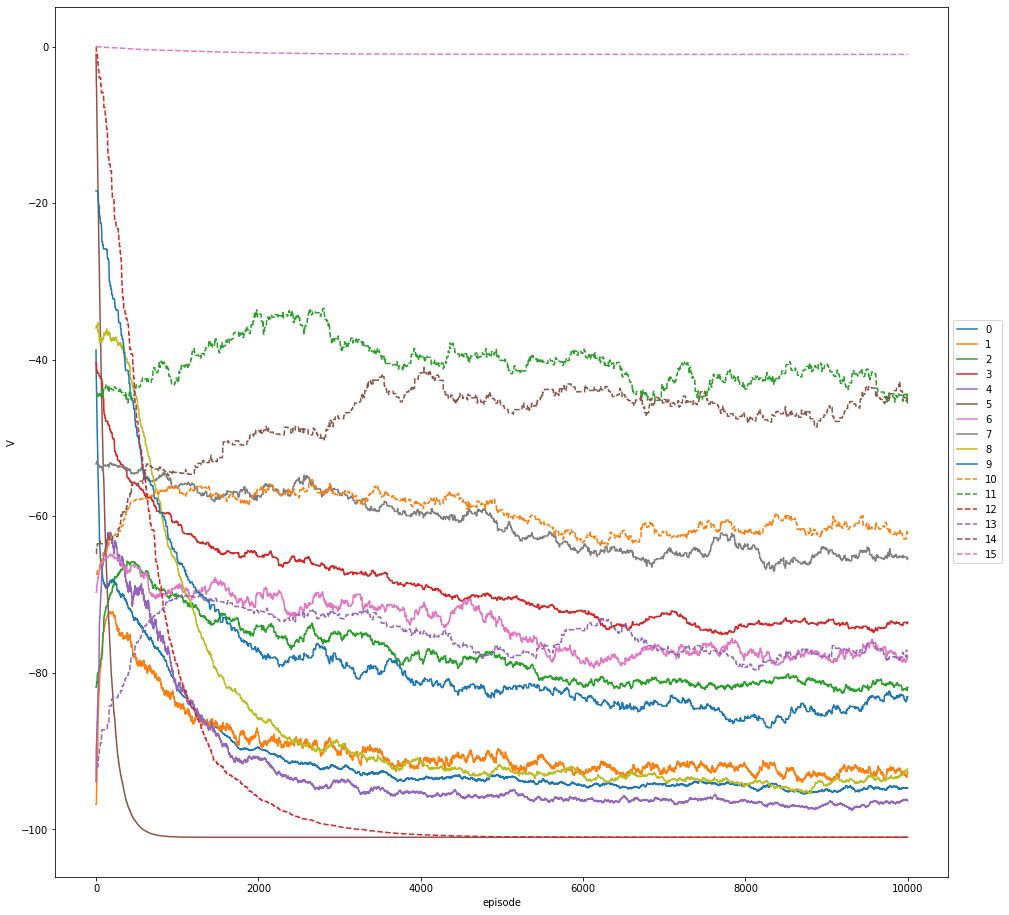

In [ ]:
plot_learning_all_state(V_history_TD)

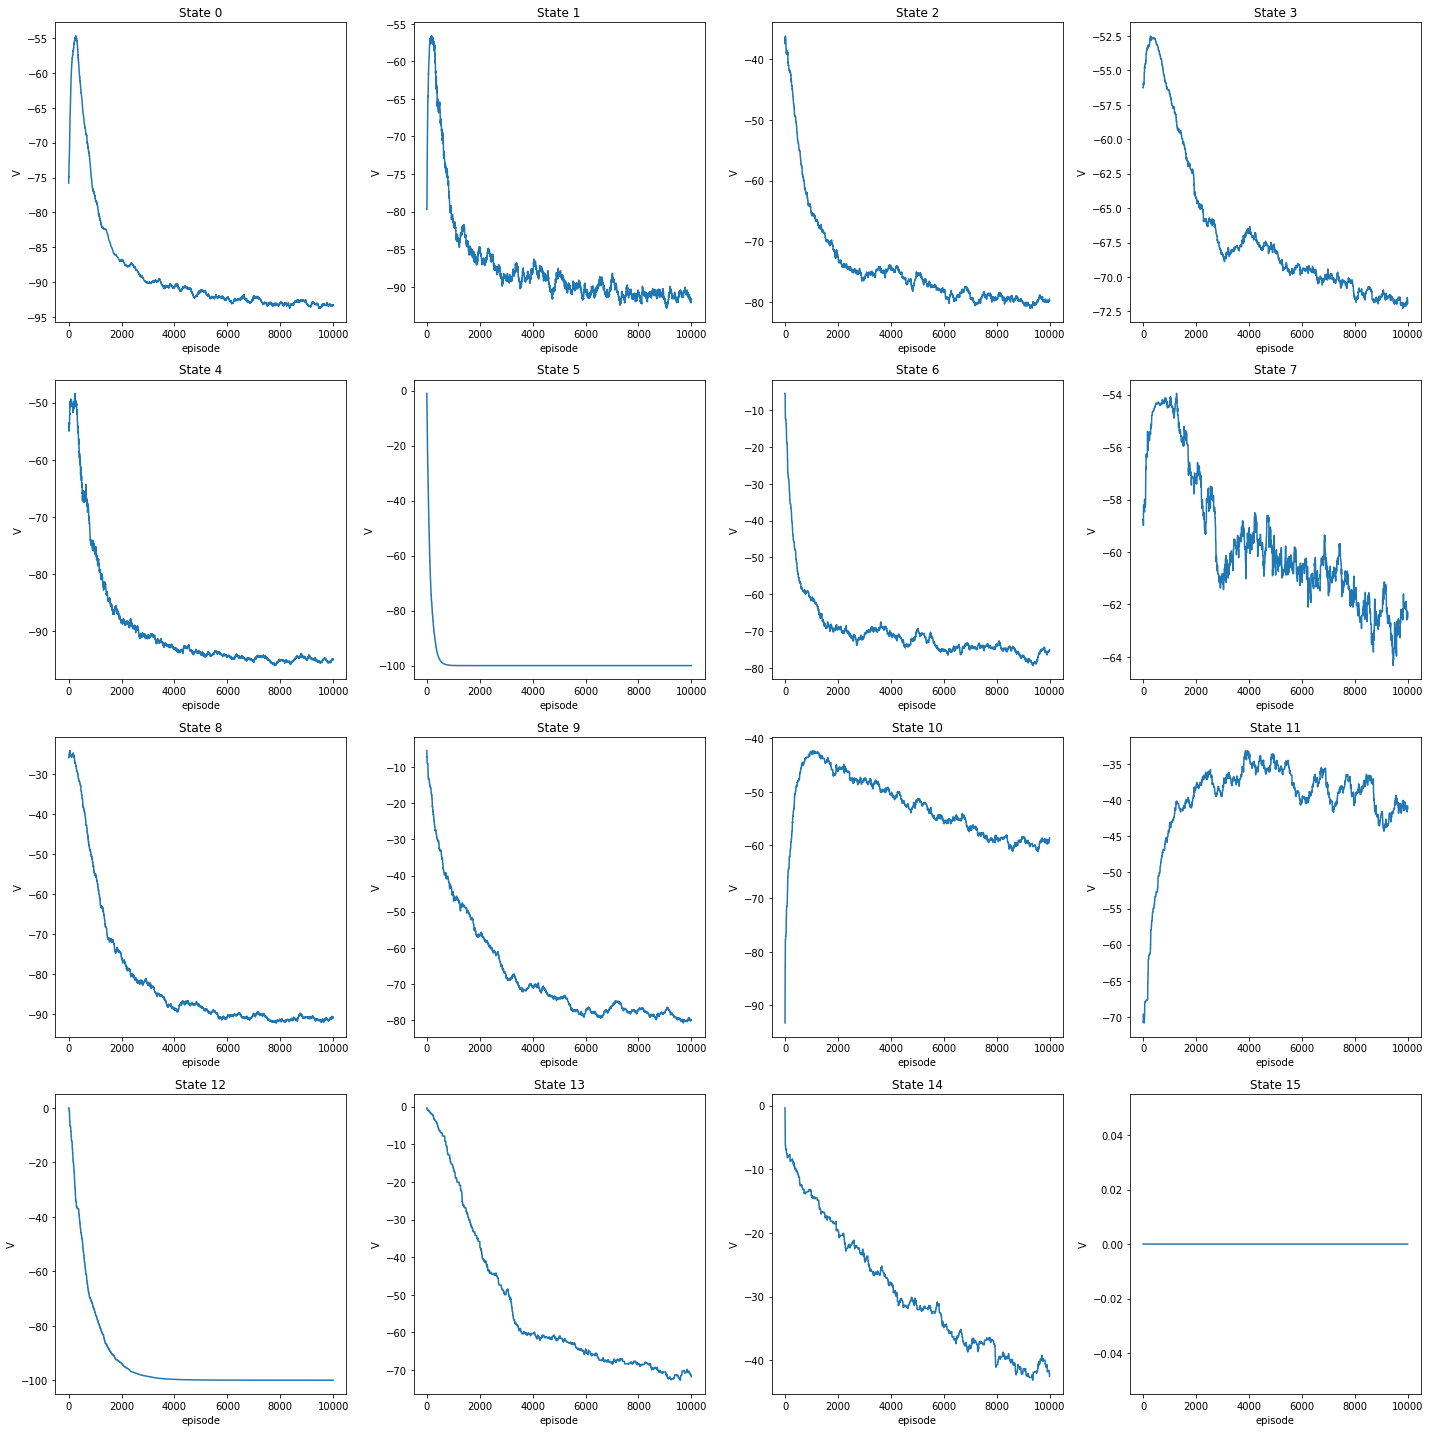

In [ ]:
plot_learning_value(V_history_TD)


[[ -94.72764595  -92.66460146  -81.82169629  -73.5182053 ]
 [ -96.36887886 -101.          -77.94898368  -65.42651697]
 [ -92.26746244  -83.02251849  -62.22607175  -45.56004947]
 [-100.99995451  -77.17302466  -44.9216439    -0.99951833]]


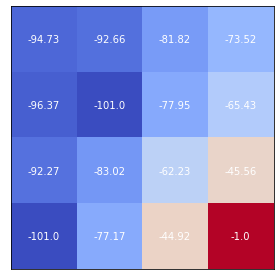

In [ ]:
grid_map(V_history_TD[9999])

3. Now, implement the n-step TD algorithm to estimate V (s). Use a step size of  = 0:01.
This algorithm should take the additional hyper-parameter n to determine how much
to bootstrap. Now set n = 1, and train the algorithm for 10000 episodes. Plot the the
same gure as before (V (s) for each s over the number of episodes), and compare it
to TD(0) and Every visit Monte Carlo Prediction. For the report:

In [ ]:
#TD algorithm

In [ ]:
def n_step_td(policy, env, alpha=0.01, gamma=0.99, n=2):
    # In temporal difference learning terminal states needs to be 0 to appropriately converge

    V = [-100 * np.random.rand() for i in range(env.observation_space.n)]
    #Action space array for action selection
    possible_actions = [i for i in range(env.action_space.n)]
    V_history = []
    for episode in range(10000):
        #Initialize.
        env.reset()
        #Store
        V_history.append(copy.deepcopy(V))
        current_state = 0
        done = False
        reward_history = []
        state_history = []
        state_history.append(current_state)
        # Verify terminal state
        T = math.inf

        # t timestep iterator
        t = 0
        while True:
            if t < T:
                a = np.random.choice(possible_actions, p=policy[current_state])
                next_state, reward, done, extra = env.step(a)
                reward_history.append(reward)
                state_history.append(next_state)
                current_state = next_state

                if done:
                    T = t+1
            tau = t - n + 1
            if tau >= 0:
                end = min(tau + n, T)
                G = g_n_step(reward_history, gamma, tau, end)

                if tau + n < T:
                    G = G + (gamma ** n) * (V[state_history[tau + n]])

                V[state_history[tau]] = V[state_history[tau]] + alpha * (G - V[state_history[tau]])
            if tau == T - 1: break
            t += 1
    return V_history


def g_n_step(reward_array, gamma, tau, end):
    discounted_reward = 0

    for i in range(tau, end):
        discounted_reward += gamma ** (i - tau - 1) * reward_array[i]
    return discounted_reward



In [ ]:
env5 = FrozenLakeEnv(map_name="4x4-easy", slip_rate=0)
env5.seed(2)
no_slip_pol = [[0.25 for i in range(no_splipping_env.action_space.n)] for j in range(no_splipping_env.observation_space.n)]

test = n_step_td(no_slip_pol, env5, alpha=0.01, gamma=0.99, n=1)

[[-9.55063672e+01 -9.33955475e+01 -8.16463759e+01 -7.51875758e+01]
 [-9.69177787e+01 -1.01010101e+02 -7.92774273e+01 -6.58927923e+01]
 [-9.41794332e+01 -8.34040372e+01 -6.32789205e+01 -4.25732419e+01]
 [-1.01010097e+02 -7.83170679e+01 -4.14999477e+01 -4.94201233e-02]]


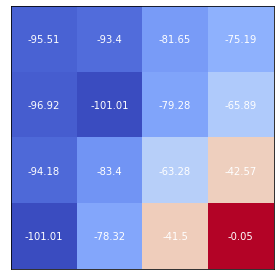

In [ ]:
grid_map(test[9999])

10


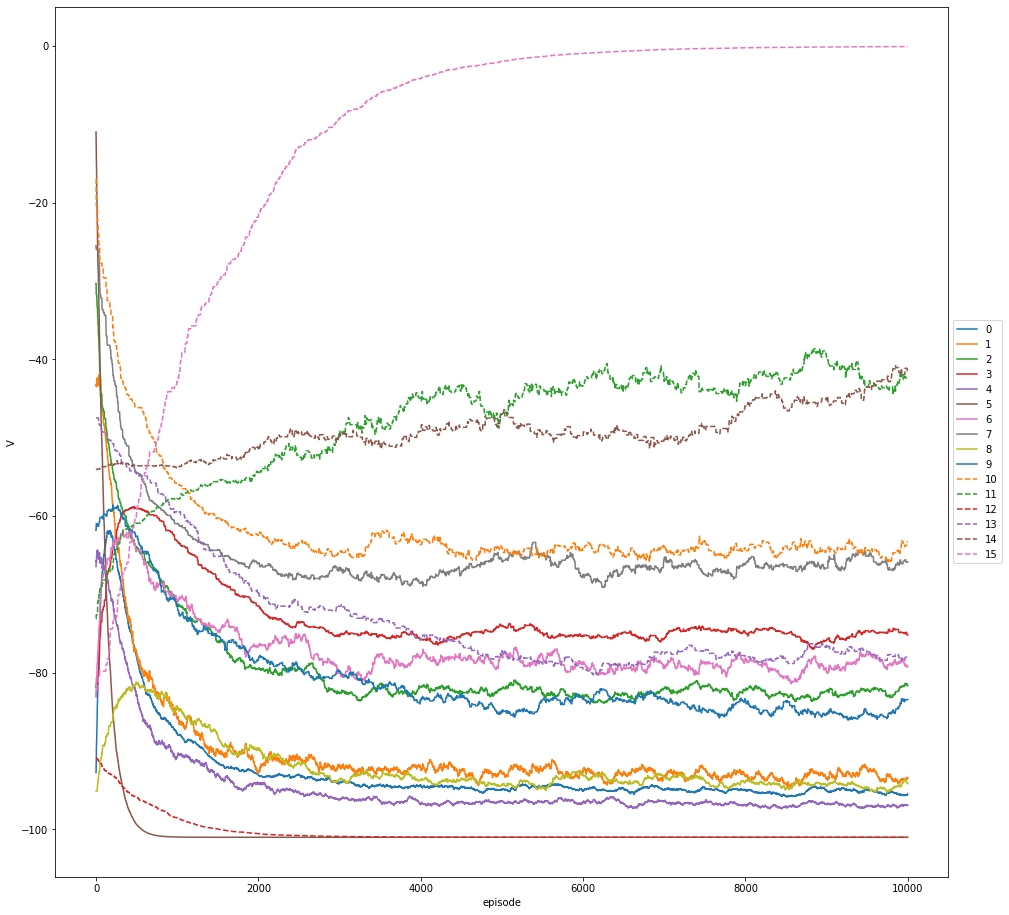

In [ ]:
plot_learning_all_state(test)

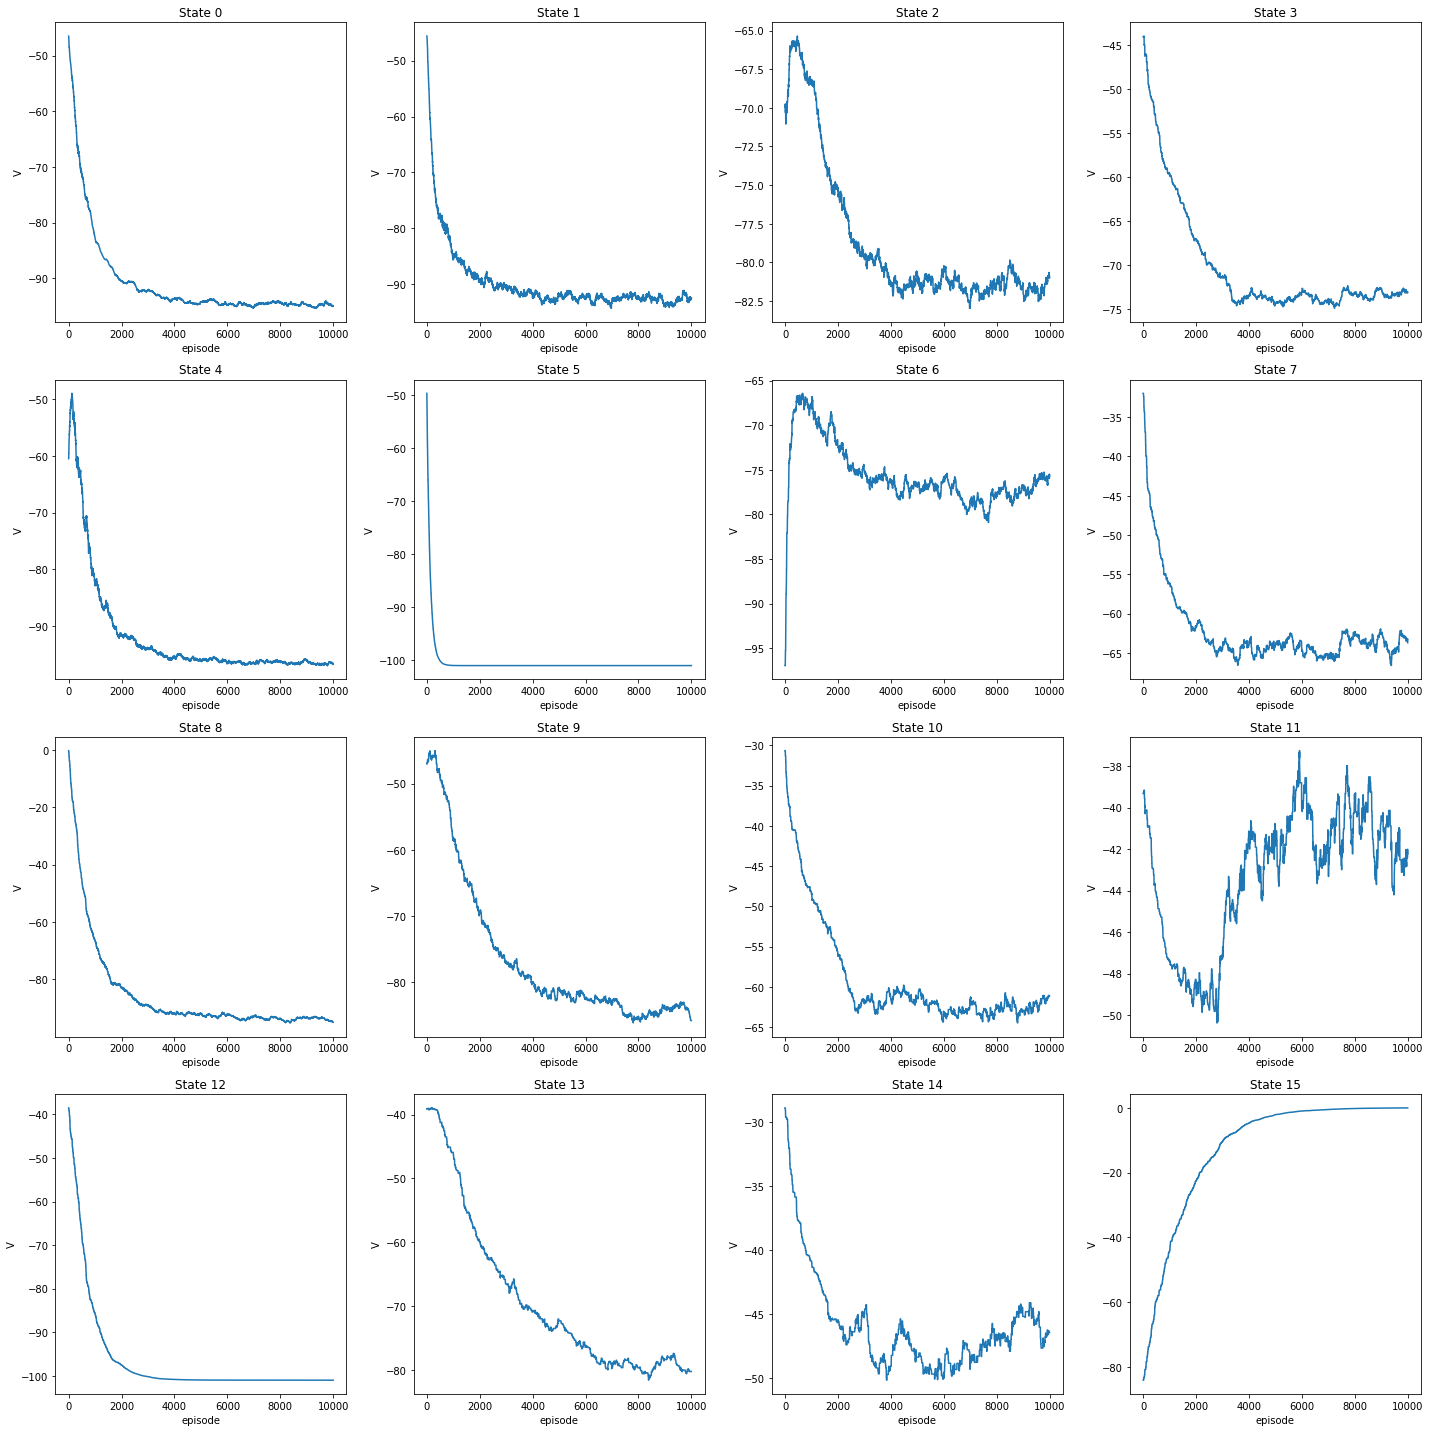

In [ ]:
plot_learning_value(test)

[[-9.46504213e+01 -9.24558653e+01 -8.28971305e+01 -6.95873103e+01]
 [-9.57388668e+01 -1.01010101e+02 -7.67710522e+01 -6.24955433e+01]
 [-9.49139435e+01 -8.07008175e+01 -5.52018876e+01 -4.54315691e+01]
 [-1.01010081e+02 -8.25094968e+01 -4.17273948e+01 -1.85191780e-02]]


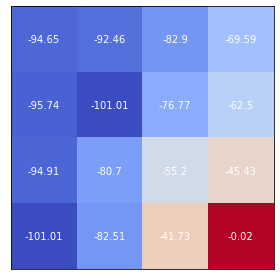

In [ ]:
#Question 4

no_splipping_env_question4 = FrozenLakeEnv(map_name="4x4-easy", slip_rate=0)
no_slip_pol = [[0.25 for i in range(no_splipping_env.action_space.n)] for j in range(no_splipping_env.observation_space.n)]

test_n100 = n_step_td(no_slip_pol, no_splipping_env, alpha=0.01, gamma=0.99, n=100)
grid_map(test_n100[9999])

10


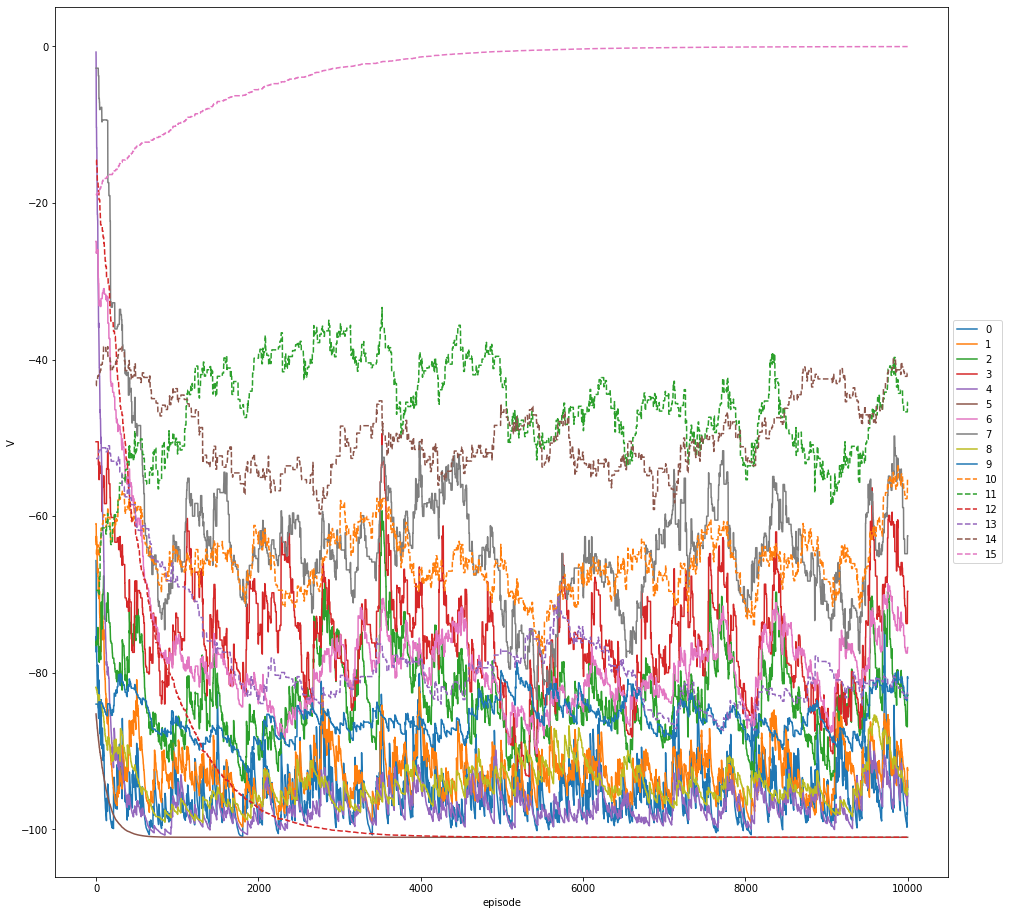

In [ ]:
plot_learning_all_state(test_n100)

In [ ]:
def modified_n_step_td(policy, env, gamma=0.99, n=100):
    # In temporal difference learning terminal states needs to be 0 to appropriately converge

    V = [-100 * np.random.rand() for i in range(env.observation_space.n)]
    #Action space array for action selection
    possible_actions = [i for i in range(env.action_space.n)]
    V_history = []
    alpha_counter = {i:0 for i in range(env.observation_space.n)}

    for episode in range(10000):
        #Initialize.

        env.reset()
        #Store
        V_history.append(copy.deepcopy(V))
        current_state = 0
        alpha_counter[current_state] +=1
        done = False
        reward_history = []
        state_history = []
        state_history.append(current_state)
        # Verify terminal state
        T = math.inf

        # t timestep iterator
        t = 0
        while True:
            if t < T:
                a = np.random.choice(possible_actions, p=policy[current_state])
                next_state, reward, done, extra = env.step(a)
                reward_history.append(reward)
                state_history.append(next_state)
                current_state = next_state
                alpha_counter[current_state] +=1

                if done:
                    T = t+1
            tau = t - n + 1
            if tau >= 0:
                end = min(tau + n, T)
                G = g_n_step(reward_history, gamma, tau, end)

                if tau + n < T:
                    G = G + (gamma ** n) * (V[state_history[tau + n]])

                V[state_history[tau]] = V[state_history[tau]] + 1/alpha_counter[state_history[tau]] * (G - V[state_history[tau]])
            if tau == T - 1: break
            t += 1
    return V_history

[[ -95.18565959  -93.64262312  -83.22708778  -74.90362486]
 [ -96.84770622 -100.74228025  -79.04085033  -68.4520194 ]
 [ -93.83791019  -83.24132414  -62.24650974  -47.78616604]
 [-100.22643682  -77.97660774  -48.60099079   -0.68645145]]


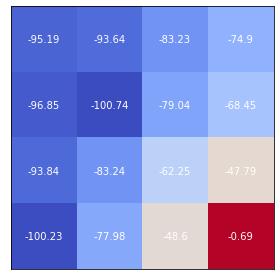

In [ ]:

no_splipping_env_question4 = FrozenLakeEnv(map_name="4x4-easy", slip_rate=0)
no_splipping_env_question4.seed(1)
no_slip_pol = [[0.25 for i in range(no_splipping_env.action_space.n)] for j in range(no_splipping_env.observation_space.n)]

test_n100MC = modified_n_step_td(no_slip_pol, no_splipping_env, gamma=0.99, n=100)
grid_map(test_n100MC[9999])

10


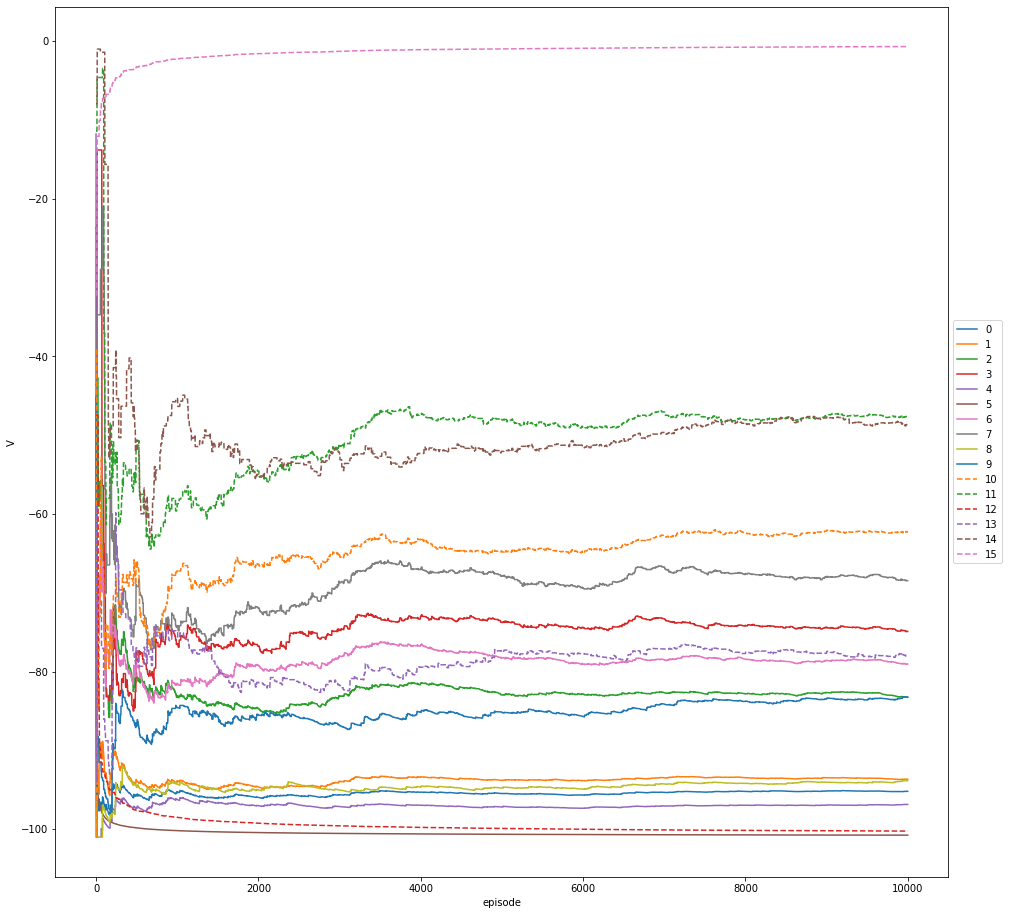

In [ ]:
plot_learning_all_state(test_n100MC)

In [ ]:
def sarsa_control_algorithm(env, epsillon=0.01, alpha=0.1, gamma=0.99):
    Q = [[np.random.rand() * -100 for j in range(env.action_space.n)] for i in range(env.observation_space.n)]
    possible_actions = [action for action in range(env.action_space.n)]

    for i in range(env.observation_space.n):
        isTerminal = False
        if env.P[i][0][0][3]:
            isTerminal = True
        for j in range(env.action_space.n):
            if isTerminal:
                Q[i][j] = 0

    undiscounted_return_history = []
    for episode in range(2000):
        current_state = 0
        env.reset()

        a = np.argmax(Q[current_state])
        if np.random.rand() < epsillon:
            a = np.random.choice(possible_actions)
        undiscounted_return = 0

        while True:
            next_state, reward, done, exta = env.step(a)
            undiscounted_return += reward
            a_ = np.argmax(Q[next_state])
            if np.random.rand() < epsillon:
                a_ = np.random.choice(possible_actions)


            Q[current_state][a] += alpha * (reward + gamma * Q[next_state][a_] - Q[current_state][a])

            a = a_
            current_state = next_state

            if done:break

        undiscounted_return_history.append(undiscounted_return)

        policy = find_policy(Q)

    return undiscounted_return_history, policy


def find_policy(Q):
    policy = []
    for actions in Q:
        temp = [0 for i in range(len(actions))]
        max_q = np.argmax(actions)
        temp[max_q] = 1
        policy.append(temp)
    return policy



        





In [ ]:
sarsa1_runs = []
sarsa1_policy_runs = []
frozen_sarsa= FrozenLakeEnv(map_name="4x4", slip_rate=0.1)
for i in range(10):
    frozen_sarsa.reset()
    frozen_sarsa.seed(random.randint(0,1000))
    sarsa_1,policy = sarsa_control_algorithm(frozen_sarsa)
    sarsa1_runs.append(sarsa_1)
    sarsa1_policy_runs.append(policy)




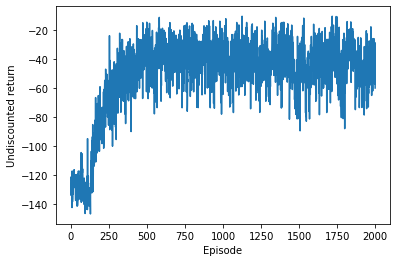

In [ ]:
plt.plot([i for i in range(len(sarsa_1))],np.mean(sarsa1_runs,axis=0))
plt.xlabel("Episode")
plt.ylabel("Undiscounted return")
plt.show()

In [ ]:

policy_selected = np.argmax([sarsa1_runs[i][1999] for i in range(10)])
pol = np.argmax(policy_selected)

In [ ]:
frozen_sarsa.reset()

generate_episode(sarsa1_policy_runs[pol],frozen_sarsa,True)


SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG


([0, 0, 4, 8, 9, 8, 9, 13, 14, 15],
 [1, 1, 1, 2, 1, 2, 1, 2, 2, 0],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, 0])

In [ ]:
#Expected Sarsa:

def expected_sarsa_algorithm(env, epsillon=0.01, alpha=0.2, gamma=0.99):
    Q = [[np.random.rand() * -100 for j in range(env.action_space.n)] for i in range(env.observation_space.n)]
    possible_actions = [action for action in range(env.action_space.n)]

    for i in range(env.observation_space.n):
        isTerminal = False
        if env.P[i][0][0][3]:
            isTerminal = True
        for j in range(env.action_space.n):
            if isTerminal:
                Q[i][j] = 0

    undiscounted_return_history = []
    for episode in range(2000):
        undiscounted_return = 0
        current_state = 0
        env.reset()


        while True:

            a = np.argmax(Q[current_state])
            if np.random.rand() < epsillon:
                a= np.random.choice(possible_actions)
            
            next_state, reward, done, exta = env.step(a)
            undiscounted_return += reward

            Q[current_state][a] += alpha * (reward + gamma * sum(Q[next_state])/4 - Q[current_state][a])

            current_state = next_state

            if done:break

        undiscounted_return_history.append(undiscounted_return)

        policy = find_policy(Q)

    return undiscounted_return_history, policy

In [ ]:
sarsa2_runs = []
sarsa2_policy_runs = []
frozen_sarsa2 =FrozenLakeEnv(map_name="4x4", slip_rate=0.1)
for i in range(10):
    frozen_sarsa2.reset()
    frozen_sarsa2.seed(random.randint(0,1000))
    sarsa_2,policy_2 = expected_sarsa_algorithm(frozen_sarsa2)
    sarsa2_runs.append(sarsa_2)
    sarsa2_policy_runs.append(policy_2)

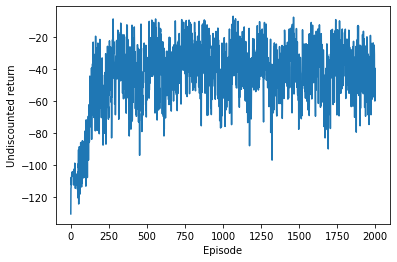

In [ ]:
plt.plot([i for i in range(len(sarsa_2))],np.mean(sarsa2_runs,axis=0))
plt.xlabel("Episode")
plt.ylabel("Undiscounted return")
plt.show()

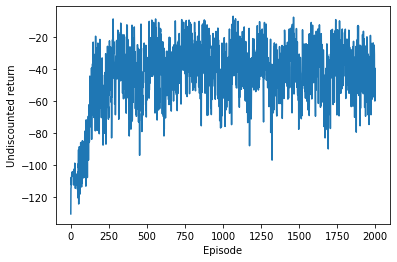


SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG


([0, 4, 8, 9, 13, 14, 15], [1, 1, 2, 1, 2, 2, 0], [-1, -1, -1, -1, -1, -1, 0])

In [ ]:

policy_select2 = np.argmax([sarsa2_runs[i][1999] for i in range(10)])
pol2 = np.argmax(policy_select2)
plt.plot([i for i in range(len(sarsa_2))],np.mean(sarsa2_runs,axis=0))
plt.xlabel("Episode")
plt.ylabel("Undiscounted return")
plt.show()
frozen_sarsa2.reset()
generate_episode(sarsa2_policy_runs[pol2],frozen_sarsa2,True)

In [ ]:
#Q-learning
def sarsa_q_learning_algorithm(env, epsillon=0.02, alpha=0.1, gamma=0.99):
    Q = [[np.random.rand()*-100 for j in range(env.action_space.n)] for i in range(env.observation_space.n)]
    possible_actions = [action for action in range(env.action_space.n)]

    for i in range(env.observation_space.n):
        isTerminal = False
        if env.P[i][0][0][3]:
            isTerminal = True
        for j in range(env.action_space.n):
            if isTerminal:
                Q[i][j] = 0

    undiscounted_return_history = []
    for episode in range(2000):
        undiscounted_return = 0
        current_state = 0
        env.reset()


        while True:

            a = np.argmax(Q[current_state])
            if np.random.rand() < epsillon:
                a= np.random.choice(possible_actions)
            
            next_state, reward, done, exta = env.step(a)
            undiscounted_return += reward

            Q[current_state][a] += alpha * (reward + gamma * (Q[next_state][np.argmax(Q[next_state])] - Q[current_state][a]))

            current_state = next_state

            if done:break

        undiscounted_return_history.append(undiscounted_return)

        policy = find_policy(Q)

    return undiscounted_return_history, policy

In [ ]:
sarsa3_runs = []
sarsa3_policy_runs = []
frozen_sarsa3 =FrozenLakeEnv(map_name="4x4", slip_rate=0.1)
for i in range(10):
    frozen_sarsa3.reset()
    frozen_sarsa3.seed(random.randint(0,1000))
    sarsa_3,policy_3 = sarsa_q_learning_algorithm(frozen_sarsa3)
    sarsa3_runs.append(sarsa_3)
    sarsa3_policy_runs.append(policy_3)

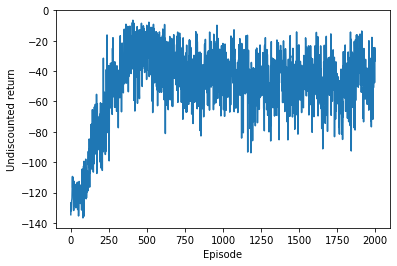

In [ ]:
plt.plot([i for i in range(len(sarsa_3))],np.mean(sarsa3_runs,axis=0))
plt.xlabel("Episode")
plt.ylabel("Undiscounted return")
plt.show()

In [ ]:

policy_select = np.argmax([sarsa3_runs[i][1999] for i in range(10)])
pol = np.argmax(policy_select)

In [ ]:
frozen_sarsa3.reset()
generate_episode(sarsa3_policy_runs[pol],frozen_sarsa3,True)


SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG


([0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 9, 13, 14, 15],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 0],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0])

Part 3:


In [ ]:
#compare with similar alpha:


In [ ]:
sarsa22_runs = []
sarsa22_policy_runs = []
frozen_sarsa22 =FrozenLakeEnv(map_name="4x4", slip_rate=0.1)
for i in range(10):
    frozen_sarsa22.reset()
    frozen_sarsa22.seed(random.randint(0,1000))
    sarsa_22,policy_22 = expected_sarsa_algorithm(frozen_sarsa22,alpha=0.1)
    sarsa22_runs.append(sarsa_22)
    sarsa2_policy_runs.append(policy_22)

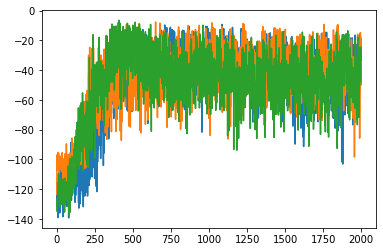

In [ ]:
x = [i for i in range(2000)]
plt.plot([i for i in range(len(sarsa_1))],np.mean(sarsa_runs,axis=0))
plt.plot([i for i in range(len(sarsa_1))],np.mean(sarsa22_runs,axis=0))
plt.plot([i for i in range(len(sarsa_1))],np.mean(sarsa3_runs,axis=0))



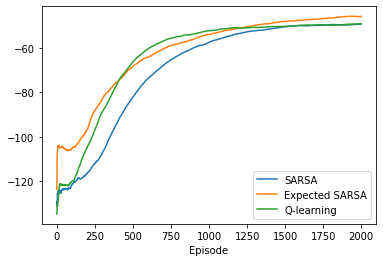

In [ ]:
def comparison(array1,array2,array3,array4):
    mean_array1 = [array1[0]]
    mean_array2 = [array2[0]]
    mean_array3 = [array3[0]]
    mean_array4 = [array3[0]]
    for i in range(1,len(array1)):

        sub_array_1 = [array1[i] for i in range(i)]
        sub_array_2 = [array2[i] for i in range(i)]
        sub_array_3 = [array3[i] for i in range(i)]
        sub_array_4 = [array4[i] for i in range(i)]


        mean_array1.append(np.mean(np.asarray(sub_array_1)))
        mean_array2.append(np.mean(np.asarray(sub_array_2)))
        mean_array3.append(np.mean(np.asarray(sub_array_3)))
        mean_array4.append(np.mean(np.asarray(sub_array_3)))

    plt.plot([i for i in range(len(sarsa_1))],mean_array1,label ="SARSA")
    plt.plot([i for i in range(len(sarsa_1))],mean_array2,label= "Expected SARSA")
    plt.plot([i for i in range(len(sarsa_1))],mean_array3,label="Q-learning")
    plt.xlabel("Episode")
    plt.legend()
    plt.show()


    
comparison(np.mean(sarsa_runs,axis=0),np.mean(sarsa22_runs,axis=0),np.mean(sarsa3_runs,axis=0),np.mean())



